**Name: -** Chinmay Bhangale

**Registration No.: -** M1910006

**Class: -** B. Tech Mechanical

#A05 K-MEANS
## Step 1: Initial setup
Import necessary libraries

In [1]:
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cluster import KMeans

#Step 2A: Load data
Confirm that dataset has 14271 samples using df.shape

In [2]:
df=pd.read_csv("Crimes.csv", header=0)
print(df.shape)

(14271, 22)


#Step 2B: Clean data - remove NaNs
Confirm that the cleaned dataset has 13058 samples.

In [3]:
df1=df.dropna()
print(df1.shape)

(13058, 22)


In [4]:
#Check datatypes of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13058 entries, 0 to 14270
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    13058 non-null  int64  
 1   Case Number           13058 non-null  object 
 2   Date                  13058 non-null  object 
 3   Block                 13058 non-null  object 
 4   IUCR                  13058 non-null  int64  
 5   Primary Type          13058 non-null  object 
 6   Description           13058 non-null  object 
 7   Location Description  13058 non-null  object 
 8   Arrest                13058 non-null  bool   
 9   Domestic              13058 non-null  bool   
 10  Beat                  13058 non-null  int64  
 11  District              13058 non-null  int64  
 12  Ward                  13058 non-null  float64
 13  Community Area        13058 non-null  float64
 14  FBI Code              13058 non-null  int64  
 15  X Coordinate       

#Step 2C: Slice the dataset to only 2 features - longitudes and lattitudes

In [5]:
df2=df1.loc[:, ["Latitude","Longitude"]]
df2

,Latitude,Longitude
0,41.766615,-87.674337
1,41.879691,-87.731530
2,41.968445,-87.708871
3,41.854537,-87.712418
4,41.851561,-87.723887
...,...,...
14266,41.877110,-87.723964
14267,41.778161,-87.695806
14268,41.859798,-87.729873
14269,41.898451,-87.768768


#Step 3: Visualize data

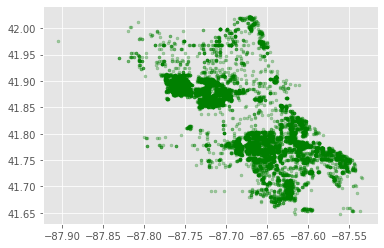

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df2.Longitude, df2.Latitude, marker='.',c='green', alpha=0.3)
plt.show()

#Step 4: Implement K-Means

centroids [[ 41.80362299 -87.62032881]
 [ 41.89340688 -87.75687531]
 [ 41.69660195 -87.63106579]
 [ 41.98175614 -87.68506657]
 [ 41.8781949  -87.70960111]
 [ 41.75292523 -87.58280676]
 [ 41.77247112 -87.66490204]]
inertia 9.385799382880112


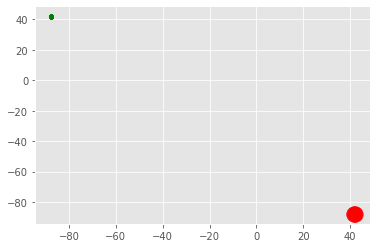

In [7]:
model=KMeans(7)
model.fit(df2)
centroids = model.cluster_centers_
print("centroids", centroids)
inertia = model.inertia_
print("inertia", inertia)
ax.scatter(centroids[:,0], centroids[:,1], marker='o', c='red', alpha=0.5, linewidths=3, s=169)
plt.show()
fig

### Elbow method

In [8]:
inertias = []   # List to store inertia values for different number of clusters.
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df2)
    inertias.append(model.inertia_)


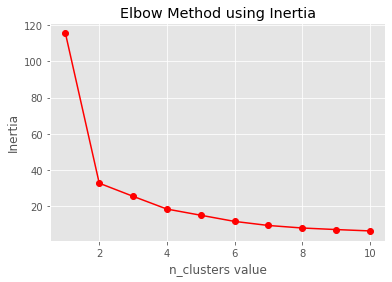

In [9]:
# Plot
plt.plot(list(range(1,11)), inertias, "or-")
plt.xlabel('n_clusters value')
plt.ylabel('Inertia')
plt.title('Elbow Method using Inertia')
plt.show()

In [10]:
print("Least inertia value: {} when n_clusters: {}".format(min(inertias),
                                                           inertias.index(min(inertias))+1))

Least inertia value: 6.378955706709137 when n_clusters: 10
